In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print(true_w.shape)
sz = torch.ones((1, 2))
print("1*2", sz, sz.shape)
print('features:', features[0],'\nlabel:', labels[0])

torch.Size([2])
1*2 tensor([[1., 1.]]) torch.Size([1, 2])
features: tensor([ 0.5948, -1.2327]) 
label: tensor([9.5757])


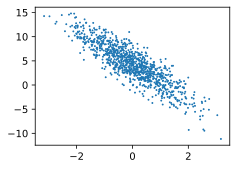

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 15
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2504, -0.8666],
        [ 0.3121, -0.6230],
        [-0.6468,  0.2372],
        [ 0.7021, -1.1530],
        [-1.1521, -0.3443],
        [-0.0559,  0.4358],
        [-2.7325,  0.0896],
        [-0.2791, -1.0267],
        [-0.5562,  0.2109],
        [ 0.7970, -1.7428],
        [-0.3784, -1.8197],
        [ 0.2502,  1.1764],
        [ 1.5109, -0.2287],
        [ 1.0366, -0.9907],
        [-1.0232, -0.7729]]) 
 tensor([[ 6.6316],
        [ 6.9441],
        [ 2.0951],
        [ 9.5058],
        [ 3.0601],
        [ 2.5878],
        [-1.5761],
        [ 7.1249],
        [ 2.3603],
        [11.7299],
        [ 9.6396],
        [ 0.7096],
        [ 7.9934],
        [ 9.6327],
        [ 4.7763]])


In [6]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def squared_loss(y_hat, y):  #@save
    """均方损失"""
    # print("shape before", y_hat.shape, y.shape)
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        # print(f"epoch {poch}, train_loss: {l.sum()}")
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 0.238087
epoch 2, loss 0.003377
epoch 3, loss 0.000100
w的估计误差: tensor([ 0.0021, -0.0043], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0083], grad_fn=<RsubBackward1>)
